In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf  


In [54]:
import os

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/University/Semester 7/Deep Learning/Assignments/01/Question 1 & 2/Archive/data'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    data.append(img)  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

# data = np.array(data)
labels = np.array(labels)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [55]:
print(X_train)
print(y_train)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 249, 224, 217],
       [255, 255, 255, ..., 253, 221, 206],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 249, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[118, 122, 114, ..., 255, 255, 255],
       [255, 255, 248, ..., 255, 255, 255],
       [253, 246, 229, ..., 255, 255, 255],
       ...,
       [105, 102,  97, ..., 255, 255, 255],
       [107, 103, 100, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[119, 129, 130, ..., 255, 255, 255],
       [253, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [56]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = []
faces = []
new_x = []
cropped_image = ''
for i in range(0, len(X_train)):
    img.append(X_train[i])
    faces.append(face_cascade.detectMultiScale(img[i], scaleFactor=1.1, minNeighbors=5, minSize=(20, 20)))
    
    for (x,y,w,h) in faces[i]:
        cropped_image = img[i][y:y+h, x:x+w]
        new_x.append(cropped_image)
        cv2.imwrite(f'crop/cropped_face_{i}.jpg', cropped_image)


In [57]:
fixed_size = (128, 128)
resized_images = []

for image in new_x:
    resized_image = cv2.resize(image, fixed_size)
    resized_images.append(resized_image)

# Convert the list of resized images to a NumPy array
new_x = np.array(resized_images)
print(new_x.shape)
print(y_train.shape)

(132, 128, 128)
(132,)


In [58]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(new_x, y_train, test_size=0.2, random_state=42)

# Normalize image data
X_train = X_train / 255
X_test = X_test / 255

# Reshape the data to be used by a simple ANN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot vectors
y_train_new = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(16384,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])


In [59]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_new, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/200
3/3 [==============================] - 0s 58ms/step - loss: 5.9249 - accuracy: 0.0833 - val_loss: 3.5024 - val_accuracy: 0.2381
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 3.8306 - accuracy: 0.0952 - val_loss: 3.9976 - val_accuracy: 0.0952
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 3.4866 - accuracy: 0.1190 - val_loss: 2.3697 - val_accuracy: 0.1905
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 2.5984 - accuracy: 0.2143 - val_loss: 2.4686 - val_accuracy: 0.1429
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 2.2053 - accuracy: 0.1786 - val_loss: 2.4229 - val_accuracy: 0.1429
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 2.0150 - accuracy: 0.2738 - val_loss: 2.2853 - val_accuracy: 0.2381
Epoch 7/200
3/3 [==============================] - 0s 27ms/step - loss: 1.7950 - accuracy: 0.4405 - val_loss: 2.0282 - val_accuracy: 0.3810
Epoch 8/200
3/3 [===

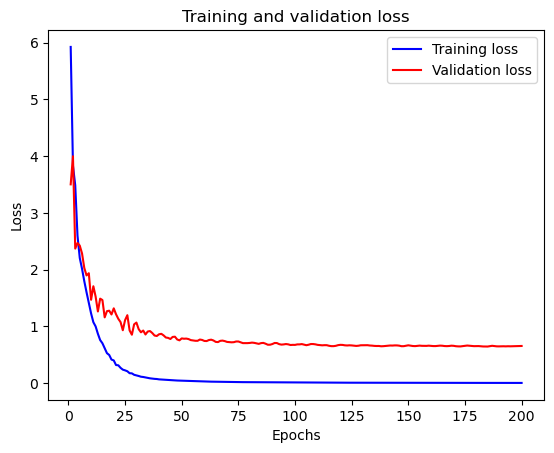

In [60]:
# plot the training and validation accuracy and loss at each epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()    
plt.show()

In [61]:
def crop_and_resize(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    for (x, y, w, h) in faces:
        cropped_image = gray[y:y+h, x:x+w]  # Crop the grayscale image
        resized_image = cv2.resize(cropped_image, (128, 128))
        cv2.imwrite(f'crop/cropped_face_{i}.jpg', cropped_image)
    return resized_image


In [62]:
# Capture a new employee's face picture
new_employee_image = cv2.imread('Windows.jpg')
cropped_new_employee_image = crop_and_resize(new_employee_image)  # Implement your cropping and resizing function

# Normalize the image
cropped_new_employee_image = cropped_new_employee_image / 255

# Reshape the image for prediction
cropped_new_employee_image = cropped_new_employee_image.reshape(1, -1)
print(X_train.shape)
print(cropped_new_employee_image.shape)

# # Make a prediction using the existing model
prediction = model.predict(cropped_new_employee_image)
print(prediction.shape)

print(y_train.shape)


(105, 16384)
(1, 16384)
1/1 [==============================] - 0s 25ms/step
(1, 15)
(105,)


In [63]:
# Assuming you have employee labels for each class (0 to 14), you need to determine the label for the new employee.
# You can do this by choosing the class with the highest prediction score in new_employee_prediction.
new_employee_label = np.argmax(prediction)

# Add the new employee's data to the training dataset
X_train = np.vstack([X_train, cropped_new_employee_image])
y_train = np.append(y_train, new_employee_label)

# Update the one-hot encoded labels for y_train
y_train_new = tf.keras.utils.to_categorical(y_train)

# Fine-tune the existing model with the updated dataset
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_new, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 0s 69ms/step - loss: 0.3411 - accuracy: 0.8929 - val_loss: 3.7588 - val_accuracy: 0.3182
Epoch 2/200
3/3 [==============================] - 0s 23ms/step - loss: 0.5824 - accuracy: 0.8333 - val_loss: 1.3172 - val_accuracy: 0.7273
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1354 - accuracy: 0.9762 - val_loss: 1.3311 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0931 - accuracy: 0.9881 - val_loss: 0.8912 - val_accuracy: 0.7273
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 1.1161 - val_accuracy: 0.6818
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.8843 - val_accuracy: 0.7727
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.6099 - val_accuracy: 0.8636
Epoch 8/200
3/3 [===

In [64]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# recall precision and f1 score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    

1/1 [==============================] - 0s 20ms/step - loss: 0.2292 - accuracy: 0.9630


Test accuracy: 0.9629629850387573
1/1 [==============================] - 0s 57ms/step
Accuracy: 0.9629629629629629
Precision: 0.8846153846153846
Recall: 0.9230769230769231
F1 Score: 0.8974358974358974


c:\Users\shehe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


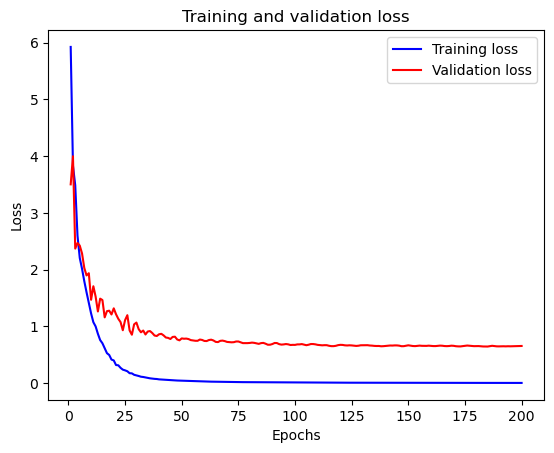

In [65]:
# plot the training and validation accuracy and loss at each epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
# print(np.unique(y_train, return_counts=True))

# # get length of unique labels
# num_classes = len(np.unique(y_train))
# print(num_classes)

# print(y_train)

# # Increment the label for the new employee
# new_emp_label = num_classes

# # Update the number of classes
# num_classes += 1


In [67]:
# # add new class to y_train
# y_train = np.append(y_train, new_emp_label)

# # add new image to X_train
# X_train = np.vstack([X_train, cropped_new_employee_image])

# # convert new label to one-hot encoding
# y_train = tf.keras.utils.to_categorical(y_train)


In [68]:
# print(X_train.shape)
# print(y_train.shape)

In [69]:
# model.layers[-1].units += 1 

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fit the model again
# history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)
